## Quiz 3: KNN

1. Generate a sample using make_blobs from sklearn.datasets with n_samples = 200, center = 3, cluster_std = 1.0 and plot it using a scatter plot where different colours indicate different clusters (1 point)

2. In the KNN lecture notes, it says that there are many methods to calculate the distance between points. So far we have studied euclidean distance, so in this quiz we would like you to explore other distance measurement methods. Please implement **at least one other distance measurement method** and include it in your KNN class which you have implemented in your KNN assignment. (3 points)

Note: Your class should allow users to choose their own distance measurement method, and should raise ValueError when undefined methods was given as input

Hint: https://machinelearningmastery.com/distance-measures-for-machine-learning/

3. Perform cross validation to find the best value of k and perform classification using **all** the distance measurement methods (also raise ValueError) you have implemented. (3 points)

4. **Justify and Discuss** your results i.e. distant measurement methods, value of k, etc. (2 points)

In [10]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import average_precision_score, classification_report
from sklearn.preprocessing import label_binarize

In [11]:
X, y = make_blobs(n_samples=200, centers=3,
                  random_state=0, cluster_std=1.0)

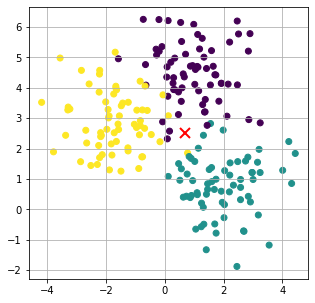

In [12]:
xfit = np.linspace(-1, 3.5)

figure = plt.figure(figsize=(5, 5))
ax = plt.axes()  #get the instance of axes from plt

ax.grid()
ax.scatter(X[:, 0], X[:, 1], c=y)

#where should this value be classified as?
ax.plot([0.7], [2.5], 'x', color='red', markeredgewidth=2, markersize=10)

#let's say roughly 5 neighbors
# circle = plt.Circle((0.6, 2.1), 0.5, color='red', fill=False)
# ax.add_artist(circle)

In [13]:
#standardize
scaler = StandardScaler()
X = scaler.fit_transform(X)

#do train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [35]:
class KNN:
    def __init__(self, k=3, method="euclidean"):
        self.k = k
        self.method = method

    def find_distance(self, X_train, X_test):
        #create newaxis simply so that broadcast to all values
        dist = X_test[:, np.newaxis, :] - X_train[np.newaxis, :, :]
        
        p = 2
        if (self.method == "manhattan"):
            p = 1
            dist = abs(dist)

        sq_dist = dist ** p

        #sum across feature dimension, thus axis = 2
        summed_dist = sq_dist.sum(axis=2)
        sq_dist = np.dot(summed_dist, 1/p)
        return sq_dist
    
    def find_neighbors(self, X_train, X_test):
        dist = self.find_distance(X_train, X_test)
        #return the first k neighbors
        neighbors_ix = np.argsort(dist)[:, 0:self.k]
        return neighbors_ix

    def get_most_common(self, y, k):
        y_nearest = y[0:k]
        bincount = np.bincount(y_nearest)
        largest = bincount.argmax()
        second_largest = bincount.argsort()[-2:][0]
        prob = bincount[largest] / bincount.sum()
        if bincount[largest] == bincount[second_largest]:
            y_nearest = y[0: k+1]
            return np.bincount(y_nearest).argmax(), prob
        return largest, prob
    
    def cv(self, X_train, X_test, y_train, ka):
        yhat_cv = np.zeros((len(ka)))
        yhat_cv_prob = np.zeros((len(ka)))
        for k_idx, k in enumerate(ka):
            self.k = k
            yhat, yhat_prob = self.predict(X_train, X_test, y_train)
            acc = np.sum(yhat == y_test)/len(y_test)
            yhat_cv[k_idx] = acc
            yhat_cv_prob[k_idx] = yhat_prob.mean()
        return yhat_cv, yhat_cv_prob

    def predict(self, X_train, X_test, y_train):
        neighbors_ix = self.find_neighbors(X_train, X_test)
        pred = np.zeros(X_test.shape[0])
        prob = np.zeros(X_test.shape[0])
        for ix, y in enumerate(y_train[neighbors_ix]):
            yhat, yhat_prob = self.get_most_common(y, self.k)
            pred[ix] = yhat
            prob[ix] = yhat_prob
        return pred, prob

In [36]:
model = KNN(k=2) # k=2
yhat, prob = model.predict(X_train, X_test, y_train)

n_classes = len(np.unique(y_test))

print("Accuracy: ", np.sum(yhat == y_test)/len(y_test))

print("=========Average precision score=======")
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2, 3])
yhat_binarized = label_binarize(yhat, classes=[0, 1, 2, 3])

for i in range(n_classes):
    class_score = average_precision_score(y_test_binarized[:, i], yhat_binarized[:, i])
    print(f"Class {i} score: ", class_score)
    
print("=========Classification report=======")
print("Report: ", classification_report(y_test, yhat))
print("Prob.: ",prob.mean())

Accuracy:  0.9333333333333333
=========Average precision score=======
Class 0 score:  0.8636363636363636
Class 1 score:  0.9545454545454546
Class 2 score:  0.8666666666666667
=========Classification report=======
Report:                precision    recall  f1-score   support

           0       0.86      1.00      0.93        19
           1       0.95      1.00      0.98        21
           2       1.00      0.80      0.89        20

    accuracy                           0.93        60
   macro avg       0.94      0.93      0.93        60
weighted avg       0.94      0.93      0.93        60

Prob.:  0.975


In [40]:
model = KNN(k=2, method="manhattan") # k=2
yhat, prob = model.predict(X_train, X_test, y_train)

n_classes = len(np.unique(y_test))

print("Accuracy: ", np.sum(yhat == y_test)/len(y_test))

print("=========Average precision score=======")
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2, 3])
yhat_binarized = label_binarize(yhat, classes=[0, 1, 2, 3])

for i in range(n_classes):
    class_score = average_precision_score(y_test_binarized[:, i], yhat_binarized[:, i])
    print(f"Class {i} score: ", class_score)
    
print("=========Classification report=======")
print("Report: ", classification_report(y_test, yhat))
print("Prob.: ",prob.mean())

Accuracy:  0.9333333333333333
=========Average precision score=======
Class 0 score:  0.8636363636363636
Class 1 score:  0.9545454545454546
Class 2 score:  0.8666666666666667
=========Classification report=======
Report:                precision    recall  f1-score   support

           0       0.86      1.00      0.93        19
           1       0.95      1.00      0.98        21
           2       1.00      0.80      0.89        20

    accuracy                           0.93        60
   macro avg       0.94      0.93      0.93        60
weighted avg       0.94      0.93      0.93        60

Prob.:  0.9833333333333333


In [41]:
model = KNN()
ka = np.arange(2, 11)
yhat_cv, yhat_cv_prob = model.cv(X_train, X_test, y_train, ka)

for i, k in enumerate(ka):
    print(f"Score with k={k}: ", yhat_cv[i], " prob. score: ", yhat_cv_prob[i])

Score with k=2:  0.9333333333333333  prob. score:  0.975
Score with k=3:  0.9166666666666666  prob. score:  0.9666666666666666
Score with k=4:  0.9333333333333333  prob. score:  0.95
Score with k=5:  0.9333333333333333  prob. score:  0.9566666666666667
Score with k=6:  0.95  prob. score:  0.9527777777777778
Score with k=7:  0.9666666666666667  prob. score:  0.95
Score with k=8:  0.9666666666666667  prob. score:  0.94375
Score with k=9:  0.9666666666666667  prob. score:  0.9407407407407405
Score with k=10:  0.95  prob. score:  0.935


In [42]:
model = KNN(method="manhattan")
ka = np.arange(2, 11)
yhat_cv, yhat_cv_prob = model.cv(X_train, X_test, y_train, ka)

for i, k in enumerate(ka):
    print(f"Score with k={k}: ", yhat_cv[i], " prob. score: ", yhat_cv_prob[i])

Score with k=2:  0.9333333333333333  prob. score:  0.9833333333333333
Score with k=3:  0.9166666666666666  prob. score:  0.961111111111111
Score with k=4:  0.9333333333333333  prob. score:  0.9541666666666667
Score with k=5:  0.95  prob. score:  0.9566666666666667
Score with k=6:  0.9333333333333333  prob. score:  0.95
Score with k=7:  0.9666666666666667  prob. score:  0.9523809523809523
Score with k=8:  0.95  prob. score:  0.9416666666666667
Score with k=9:  0.95  prob. score:  0.9333333333333332
Score with k=10:  0.95  prob. score:  0.9333333333333333


## Justify and Discuss

From many distance measure method, we compare with our default method (euclidean) that

* Manhattan result similar with the default, I think it use same formular to compute (different from 2 to 1)

Oh no time up :/